In [1]:
import sys
sys.path
sys.path.append('..')
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, models, transforms
from torchvision.models.resnet import BasicBlock
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from model import Net
import itertools
from data import data_transforms, data_transfom_identity
use_cuda =True


In [2]:
def validation(loader, verbose=True):
    model.eval()
    validation_loss = 0
    correct = 0
    predictions = np.array([])
    targets = np.array([])

    for data, target in loader:
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        output = model(data)
        # sum up batch loss
        criterion = torch.nn.CrossEntropyLoss(reduction='elementwise_mean')
        validation_loss += criterion(output, target).data.item()
        # get the index of the max log-probability
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()
        predictions = np.concatenate([predictions,pred.cpu().numpy().reshape(-1)])
        targets = np.concatenate([targets,target.cpu().numpy().reshape(-1)])

    validation_loss /= len(loader.dataset)
    accuracy = 100. * float(correct) / len(loader.dataset)
    if verbose:
        print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            validation_loss, correct, len(loader.dataset),
            100. * correct / len(loader.dataset)))
    return predictions, targets

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [4]:
val_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder('../bird_dataset/val_images',
                         transform=data_transforms['val']),
    batch_size=10, shuffle=False, num_workers=1)


# Model evaluation, misclassified, confusion matrix

#### Loading model number

In [ ]:
model_nb = 15
print('model {}'.format(model_nb))
state_dict = torch.load('../experiment/model_'+str(model_nb)+'.pth')
model = Net(2)
model.load_state_dict(state_dict)
model.cuda()

In [12]:
predictions,targets, = validation(val_loader)


Validation set: Average loss: 0.0619, Accuracy: 88/103 (85%)



Confusion matrix, without normalization


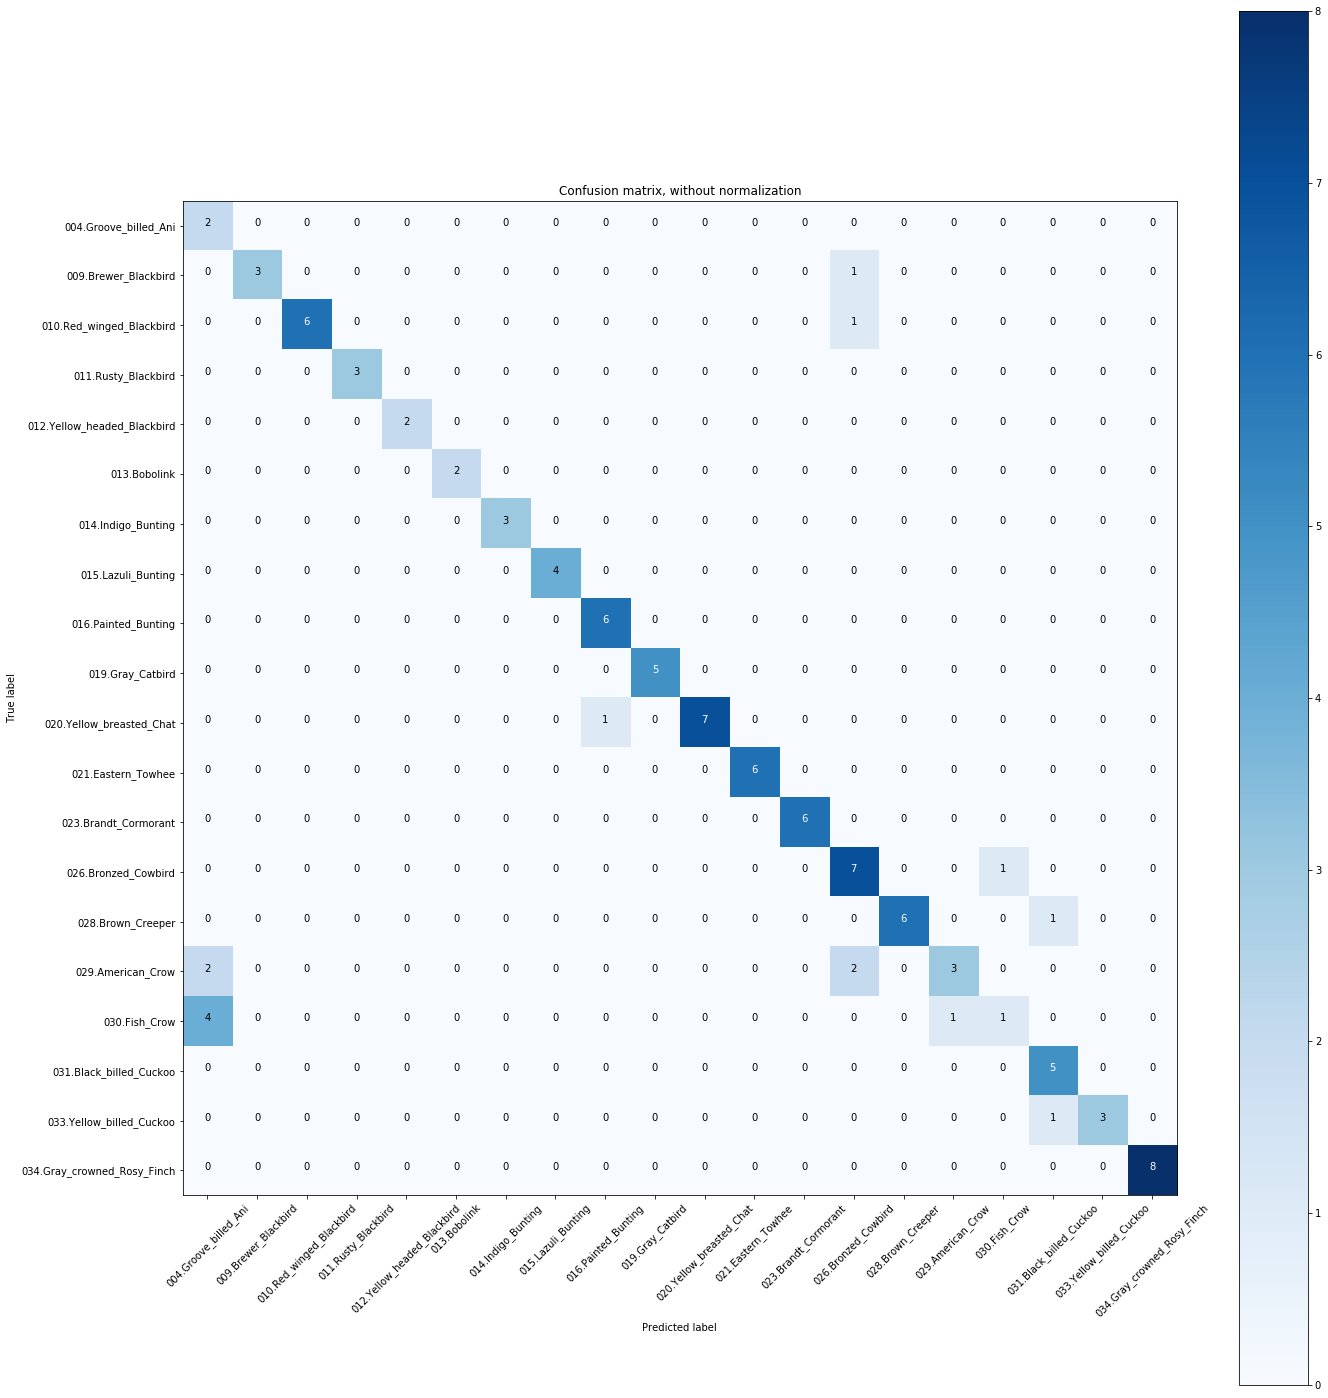

In [15]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(targets, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(20,20))
plot_confusion_matrix(cnf_matrix, classes=val_loader.dataset.classes,
                      title='Confusion matrix, without normalization')
plt.savefig('gig.png')

#### Misclassified records

In [22]:
indice_misclassified = np.where(targets != predictions)[0].reshape(-1)

In [45]:
def imshow(img):
    plt.imshow(np.transpose(img, (1, 2, 0)), interpolation='nearest')

In [32]:
val_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder('../bird_dataset/val_images',
                         transform=data_transfom_identity),
    batch_size=1000, shuffle=False, num_workers=1)


In [33]:
for data, target in val_loader:
    print('load')

load


In [36]:
indice_misclassified

array([ 2,  3,  4,  6, 15, 22, 58, 59, 65, 70, 74, 75, 76, 77, 78, 79, 80,
       81, 83, 84], dtype=int64)

In [ ]:
tara

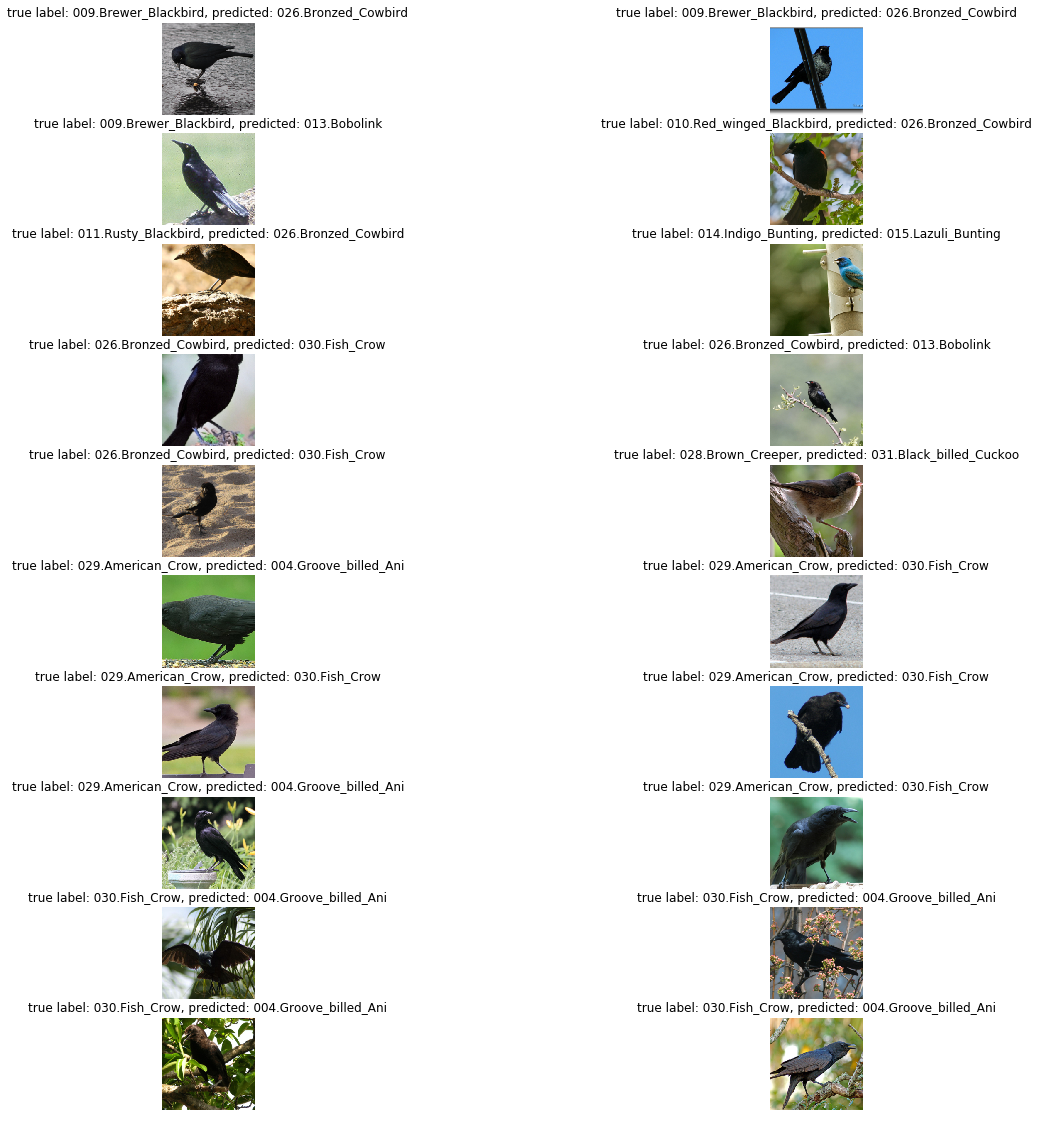

In [46]:
plt.figure(figsize=(20,20))
c = 0
for i in indice_misclassified:
    plt.subplot(10,2,c+1)
    plt.axis('off')
    plt.title('true label: {}, predicted: {}'.format(val_loader.dataset.classes[int(target[int(i)])],
                                                     val_loader.dataset.classes[int(predictions[int(i)])]))
    imshow(data[i])
    c+=1

In [48]:
val_loader.dataset.class_to_idx

{'004.Groove_billed_Ani': 0,
 '009.Brewer_Blackbird': 1,
 '010.Red_winged_Blackbird': 2,
 '011.Rusty_Blackbird': 3,
 '012.Yellow_headed_Blackbird': 4,
 '013.Bobolink': 5,
 '014.Indigo_Bunting': 6,
 '015.Lazuli_Bunting': 7,
 '016.Painted_Bunting': 8,
 '019.Gray_Catbird': 9,
 '020.Yellow_breasted_Chat': 10,
 '021.Eastern_Towhee': 11,
 '023.Brandt_Cormorant': 12,
 '026.Bronzed_Cowbird': 13,
 '028.Brown_Creeper': 14,
 '029.American_Crow': 15,
 '030.Fish_Crow': 16,
 '031.Black_billed_Cuckoo': 17,
 '033.Yellow_billed_Cuckoo': 18,
 '034.Gray_crowned_Rosy_Finch': 19}